# DE 2D PATH PLANNERS 
(DE-SPLINE AND DE-NURBS)



## Install

In [ ]:
!(pip install --force-reinstall "./dist/de2Dplanners-1.0-py3-none-any.whl") # linux (restart kernel)
# !(pip install --force-reinstall ".\dist\depathplanners-0.0.1-py3-none-any.whl") # windows

## Utils

In [1]:
import de2Dplanners
from de2Dplanners import drawpath

# Utils
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Function to get the data of case study (Very Small Soccer)

In [3]:
def getData(cases=[1]):     
    
    width = 7.5/100# maximum robot's width 
    r = (width/2)*np.sqrt(2)   
    dt = 4*r # discretization space to curves
    
    problem_params=[]
    ball_r = 0.042
    for case in cases:
        ob=[]
        if case ==1:
            # case study 1: orientação final para o gol e livre de obstáculos
            pinit = [0.2, 0.2]
            pgoal = [0.8, 0.65]
            vinit = [pgoal[0]-pinit[0], pgoal[1]-pinit[1]]        
            vgoal = [pgoal[0]-pinit[0], pgoal[1]-pinit[1]]
            thinit = np.arctan2(vinit[1], vinit[0])*180/np.pi
            
            thgoal = np.arctan2(vgoal[1], vgoal[0])*180/np.pi
            ob=[]
            
            npoints = 2*int(np.linalg.norm(np.array(pinit)-np.array(pgoal))/r) # curve points - 1 points for each r cm
            
        elif case ==2:
            # case study 1: orientação final para o gol e livre de obstáculos
            pinit = [0.2, 0.2]
            pgoal = [0.8, 0.65]
            vinit = [pgoal[0]-pinit[0], pgoal[1]-pinit[1]]
            vgoal = [2*(1.5-pgoal[0]), 2*(0.65-pgoal[1])]
            thinit = np.arctan2(vinit[1], vinit[0])*180/np.pi
            thgoal = np.arctan2(vgoal[1], vgoal[0])*180/np.pi 
            ob=[] #[[0.5,0.5,0.075*np.sqrt(2)/2]]
            npoints = 2*int(np.linalg.norm(np.array(pinit)-np.array(pgoal))/r) # curve points - 1 points for each r cm
            
                    
        
        elif case ==3:
            # long path
            pinit = [1.5-2*r, 1.3-2*r]
            pgoal = [0.38, 0.25]
            vinit = [pgoal[0]-pinit[0], pgoal[1]-pinit[1]]        
            vgoal = [1, 1]
            thinit = np.arctan2(vinit[1], vinit[0])*180/np.pi
            thgoal = np.arctan2(vgoal[1], vgoal[0])*180/np.pi
            ob = []
            ob =  [[0.375, 0.65, 0.075*np.sqrt(2)/2], [0.75, 0.65, 0.075*np.sqrt(2)/2], [1.125, 1.05, 0.075*np.sqrt(2)/2], [r, 0.65, 0.075*np.sqrt(2)/2], [1.5 -r, 0.65, 0.075*np.sqrt(2)/2]] 
            npoints = 2*int(np.linalg.norm(np.array(pinit)-np.array(pgoal))/r) # curve points - 1 points for each r cm
        
        elif case ==4:
            # case study 2: direção para o gol com obstáculos
            pinit = [0.2, 0.2]
            # pgoal = [0.75, 0.65]
            pgoal = [0.8, 0.65]
            vinit = [pgoal[0]-pinit[0], pgoal[1]-pinit[1]]
            vgoal = [2*(1.5-pgoal[0]), 2*(0.65-pgoal[1])]
            thinit = np.arctan2(vinit[1], vinit[0])*180/np.pi
            thgoal = np.arctan2(vgoal[1], vgoal[0])*180/np.pi
            thgoal = -0
            ob = []
            ob =  [[0.4, 1.2, 0.075*np.sqrt(2)/2], [1.2, 0.4, 0.075*np.sqrt(2)/2], [0.4, 0.4, 0.075*np.sqrt(2)/2], [r, 0.65, 0.075*np.sqrt(2)/2], [0.6, 0.4, 0.075*np.sqrt(2)/2], [0.3, 0.55, 0.075*np.sqrt(2)/2],[1.5 -r, 0.65, 0.075*np.sqrt(2)/2]] 
            npoints = 2*int(np.linalg.norm(np.array(pinit)-np.array(pgoal))/r) # curve points - 1 points for each r cm
                
        elif case ==5: #posição de defesa para comparação spline e nurbs        
            pinit = [140/100,1.3-121/100 ]
            pgoal = [88/100, 1.3-36/100]
            vinit = [0, 1.0]
            # vgoal = [(87.9614 - 88.9164)/100, (35.7092 -36.0058)/100 - 1.3]
            vgoal = [-1.0, -1.0]
            thinit = np.arctan2(vinit[1], vinit[0])*180/np.pi
            thgoal = np.arctan2(vgoal[1], vgoal[0])*180/np.pi
            
            ob = []
            ob =  [[1.185, 0.275, 0.075*np.sqrt(2)/2], [1.35, 0.5, 0.075*np.sqrt(2)/2],  [1.05, 0.6, 0.075*np.sqrt(2)/2],[1., 0.4, 0.075*np.sqrt(2)/2],[1.2, 0.85, 0.075*np.sqrt(2)/2]] 
            npoints = 2*int(np.linalg.norm(np.array(pinit)-np.array(pgoal))/r) # curve points - 1 points for each r cm
        
        problem_params_i = {
            "cases": [case],
            "r": r,
            "pinit":pinit,
            "pgoal":pgoal, 
            "vinit":vinit, 
            "vgoal":vgoal, 
            "thinit":thinit, 
            "thgoal":thgoal, 
            "obs" : ob, 
            "dt": dt,
            "npoints": npoints                
        }
        problem_params.append(problem_params_i)
    if len(cases)==1: return problem_params[0]
    return problem_params


## Running

### Run a single test (DE-SPLINE)

In [3]:
# get the planner
planner_spline = de2Dplanners.getPlanner(type="DE-SPLINE", debug=0)

# set problem params and use default alorithm params
problem_params  = getData(cases=[1])
planner_spline.set_problem(problem_params)

algorithm_params = {
    "boundaries" : np.array([[.0, 1.5- 0.075/2],[.0, 1.3- 0.075/2],[-4.0, 4.0],[-4.0, 4.0]]),
    "population_size" : 100,
    "memory_size" : 3, 
    "max_iterations" : 2000, 
    "alpha_costfunction" : 0.005,
    "external_costfunction": None              
}
planner_spline.set_algorithm(algorithm_params)

In [4]:
# view parameters
planner_spline.print_params()

DE-SPLINE
{'boundaries': array([[ 0.    ,  1.4625],
       [ 0.    ,  1.2625],
       [-4.    ,  4.    ],
       [-4.    ,  4.    ]]), 'population_size': 100, 'memory_size': 3, 'max_iterations': 2000, 'alpha_costfunction': 0.005, 'external_costfunction': None}
{'cases': [1], 'r': 0.053033008588991064, 'pinit': [0.2, 0.2], 'pgoal': [0.8, 0.65], 'vinit': [0.6000000000000001, 0.45], 'vgoal': [0.6000000000000001, 0.45], 'thinit': 36.86989764584402, 'thgoal': 36.86989764584402, 'obs': [], 'dt': 0.02678571428571429, 'npoints': 28}


In [5]:
# 1x run the planner
planner_spline.run()

#printing the result
print("Time = ", planner_spline.log_time[0])
print("Costfunction value = ", planner_spline.log_fit[0])   

4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-4.      4.    ]
 [-4.      4.    ]]
Time =  1.8287224769592285
Costfunction value =  0.7500000000000022


Drawing the result

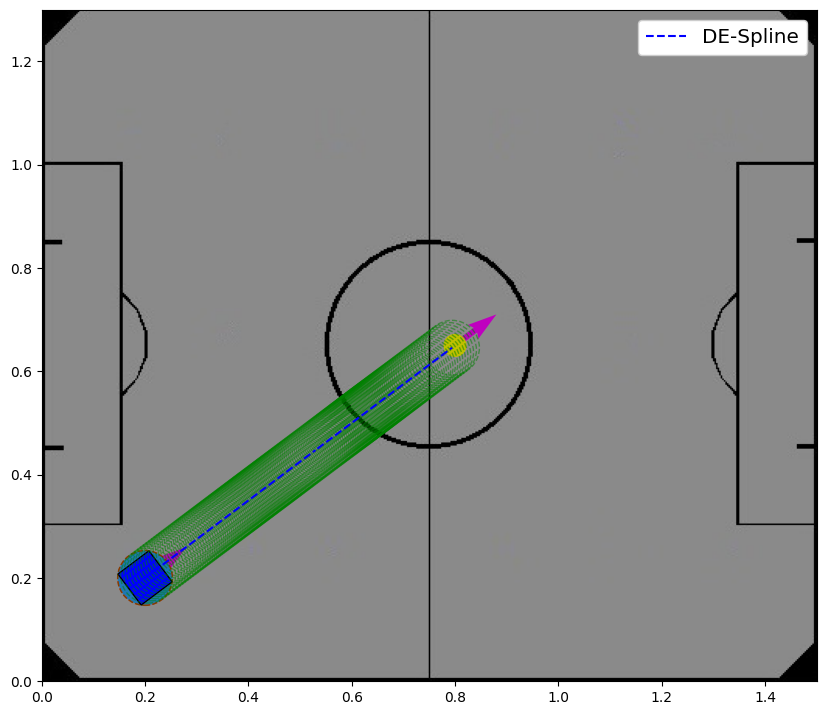

In [6]:
de2Dplanners.drawVSSSoccerAll(problem_params=problem_params, fitall_spline=[planner_spline.log_fit], path_all_spline=[planner_spline.log_path], save=0, img_path ="./campo.jpg", robot_in_path=True)

Points of the complete curve

(27, 0.8)

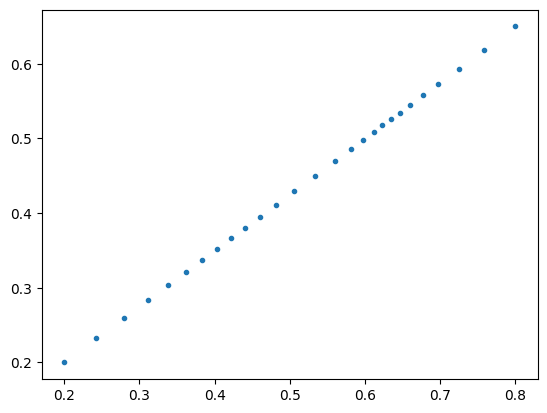

In [7]:
fx, fy = planner_spline.get_curve_points(path_params=planner_spline.log_path[0], problem_params=problem_params)
plt.plot(fx, fy, '.')  
len(fx), fx[-1]

### Run a test 10 times (DE-NURBS)

In [8]:
# get the planner with default parameters
planner_nurbs = de2Dplanners.getPlanner(type="DE-NURBS")
# params
print("aqui")
print("aqui")
problem_params  = getData(cases=[5]) # set the info of the problem
planner_nurbs.set_problem(problem_params)
algorithm_params = {
    "boundaries" : np.array([[-5.,5.],[-5.,5.],[-5.,5.],[-5.,5.],[0.1,5.],[0.1,5.]]) ,
    "population_size" : 100,
    "memory_size" : 3, 
    "max_iterations" : 2000, 
    "alpha_costfunction" : 0.0125,
    "external_costfunction": None                
}
planner_nurbs.set_algorithm(algorithm_params)
# print parameters
planner_nurbs.print_params()
print("aqui")
# 10x run the planner
planner_nurbs.run(repeat_test=10)
print("Mean Time = ", np.mean(planner_nurbs.log_time), "+-", np.std(planner_nurbs.log_time))
print("Mean costfunction value = ", np.mean(planner_nurbs.log_fit), "+-", np.std(planner_nurbs.log_fit))
print("Best costfunction value = ", np.min(planner_nurbs.log_fit))  
print("Worst costfunction value = ", np.max(planner_nurbs.log_fit))  

aqui
aqui
DE-NURBS
{'boundaries': array([[-5. ,  5. ],
       [-5. ,  5. ],
       [-5. ,  5. ],
       [-5. ,  5. ],
       [ 0.1,  5. ],
       [ 0.1,  5. ]]), 'population_size': 100, 'memory_size': 3, 'max_iterations': 2000, 'alpha_costfunction': 0.0125, 'external_costfunction': None}
{'cases': [5], 'r': 0.053033008588991064, 'pinit': [1.4, 0.09000000000000008], 'pgoal': [0.88, 0.9400000000000001], 'vinit': [0, 1.0], 'vgoal': [-1.0, -1.0], 'thinit': 90.0, 'thgoal': -135.0, 'obs': [[1.185, 0.275, 0.053033008588991064], [1.35, 0.5, 0.053033008588991064], [1.05, 0.6, 0.053033008588991064], [1.0, 0.4, 0.053033008588991064], [1.2, 0.85, 0.053033008588991064]], 'dt': 0.02767899100780006, 'npoints': 36}
aqui
6
[[-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [ 0.1  5. ]
 [ 0.1  5. ]]
6
[[-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [ 0.1  5. ]
 [ 0.1  5. ]]
6
[[-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [ 0.1  5. ]
 [ 0.1  5. ]]
6
[[-5.   5. ]
 [-5.   5. ]
 [-5.   5. ]
 [

Drawing

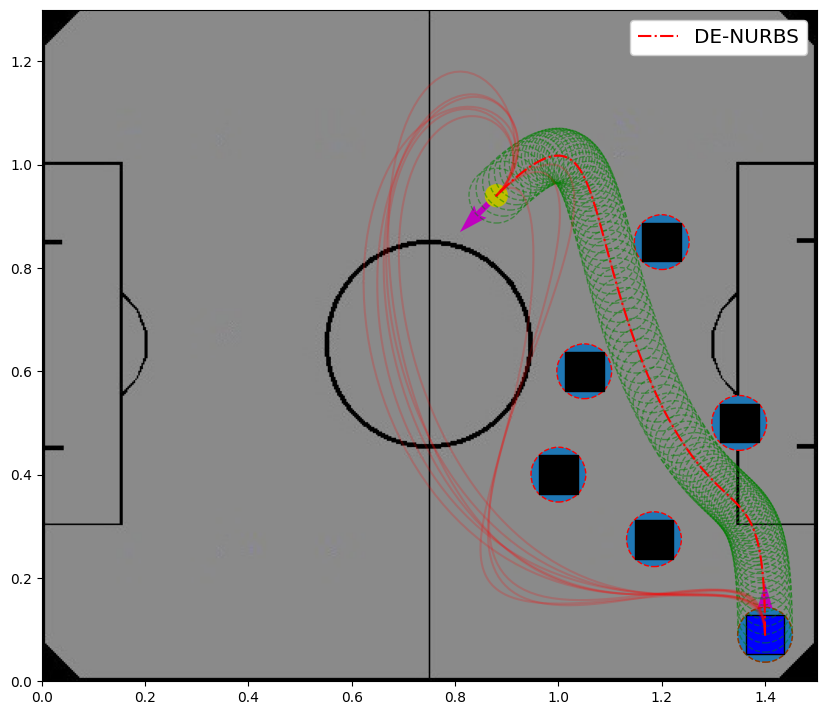

In [9]:
de2Dplanners.drawVSSSoccerAll(problem_params=problem_params, fitall_nurbs=[planner_nurbs.log_fit], path_all_nurbs=[planner_nurbs.log_path], robot_in_path=True, save=0, img_path ="./campo.jpg")

(54, 0.88, 0.9400000000000001, 1.4, 36)

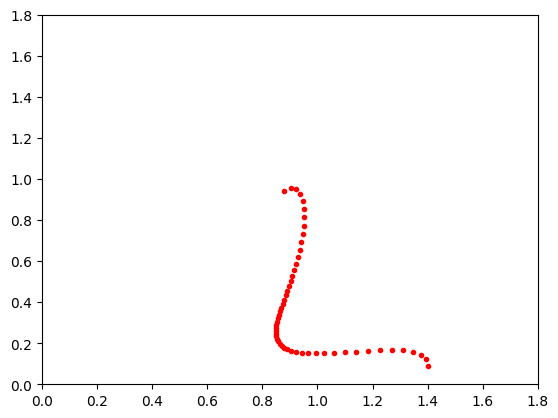

In [10]:
# Define the points of the curve
parameters = planner_nurbs.log_path[0]
points = []        
for i in range(0,len(parameters)-2,2):
    points.append([parameters[i], parameters[i+1]])

weigths = []
weigths.append(1.0)
weigths.append(1.0)          
weigths.append(parameters[-2])
weigths.append(parameters[-1])    
weigths.append(1.0)        
weigths.append(1.0)

fx, fy = planner_nurbs.nurbs(pti=planner_nurbs.pinit, ptf=planner_nurbs.pgoal, thi=planner_nurbs.thinit, thf=planner_nurbs.thgoal, points=points, weigths=weigths, alpha1=0.4, alpha2=0.4)
plt.plot(fx,fy, '.r')
plt.axis([0,1.8,0,1.8])
len(fx), fx[-1], fy[-1], fx[0], planner_nurbs.npoints

### Run and draw multiples tests

Time to load =  0.0002956390380859375
Time to load =  8.893013000488281e-05
DE-SPLINE - case =  1
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1

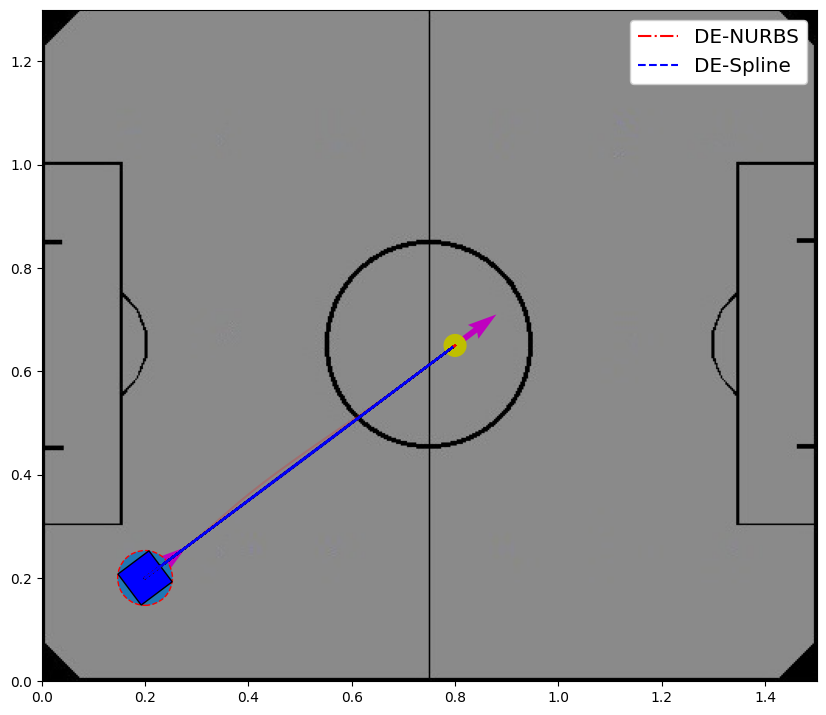

DE-SPLINE - case =  2
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.    

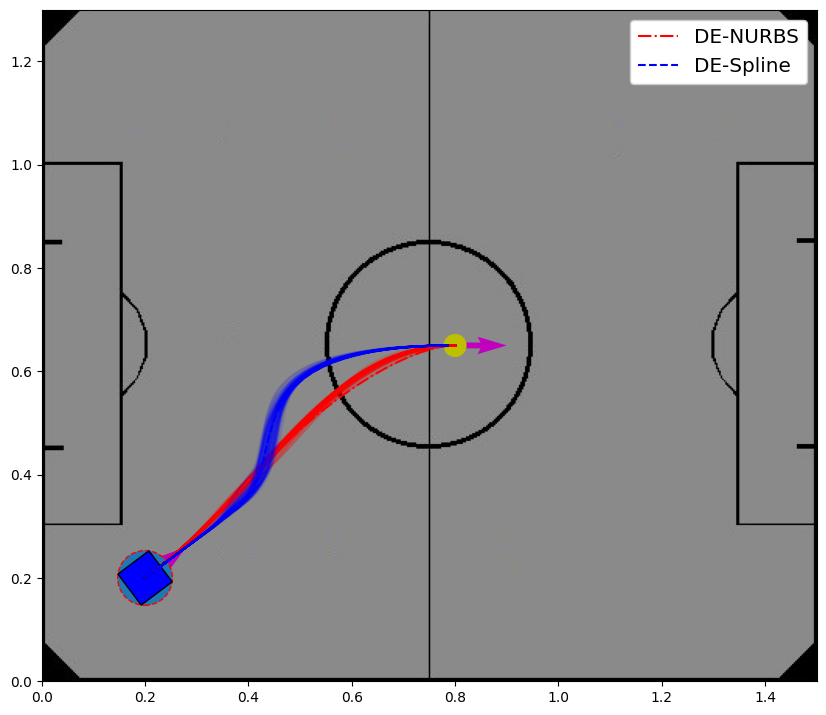

DE-SPLINE - case =  3
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.    

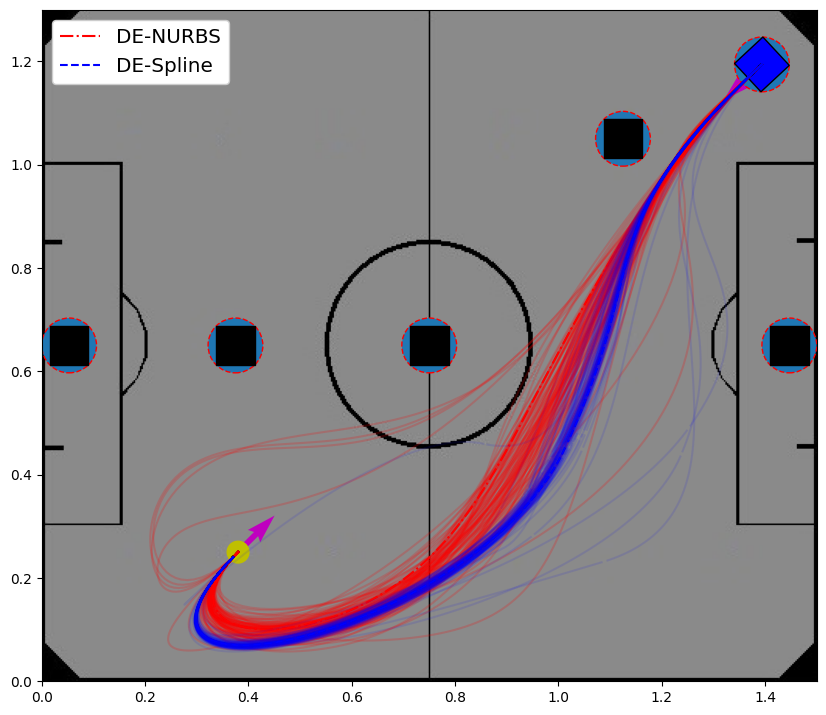

DE-SPLINE - case =  4
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.    

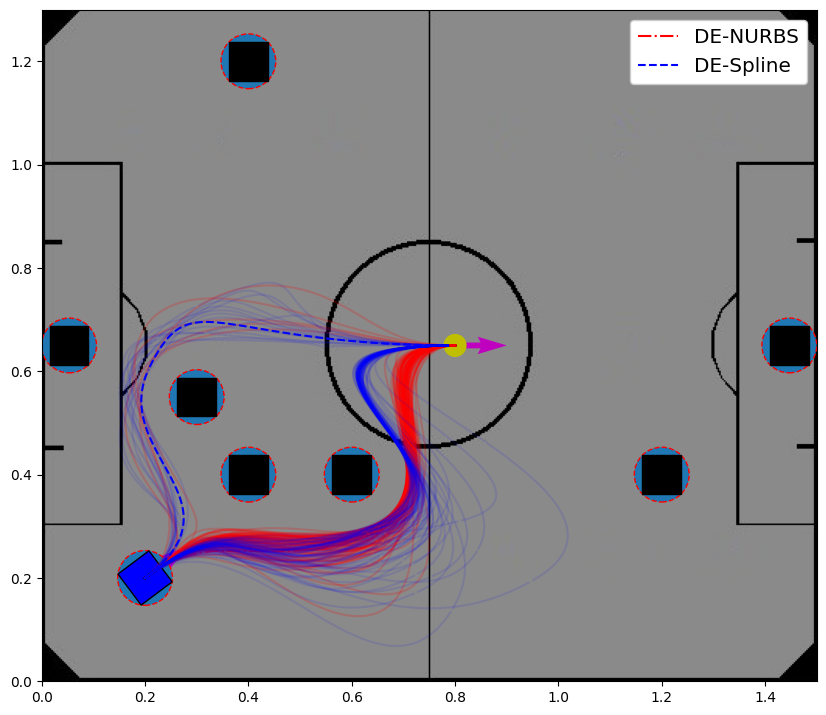

DE-SPLINE - case =  5
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.      1.2625]
 [-5.      5.    ]
 [-5.      5.    ]]
4
[[ 0.      1.4625]
 [ 0.    

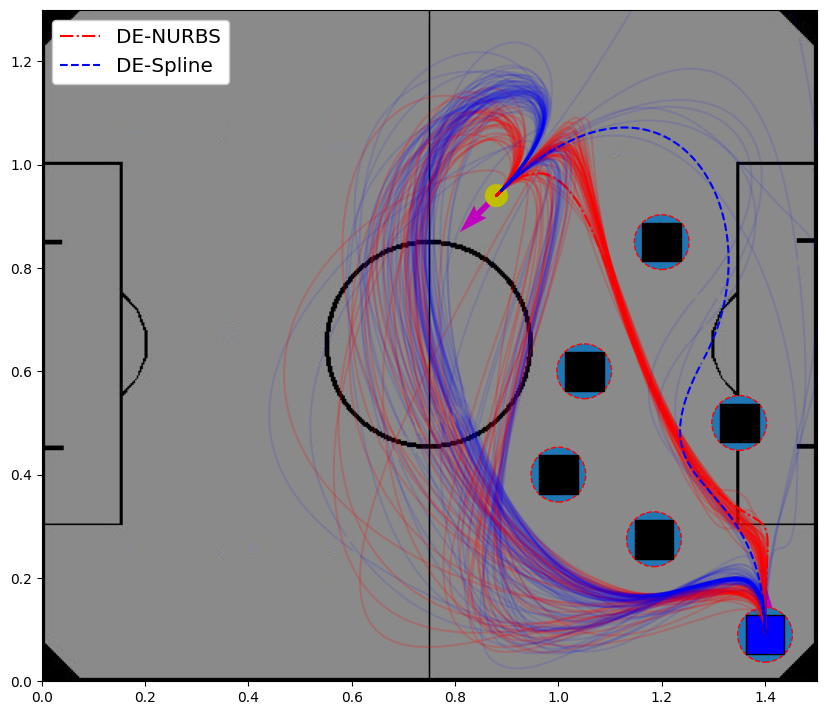

In [4]:
Nrepeat = 100
cases = [1, 2, 3, 4,  5]

# params
problem_params  = getData(cases) # set the info of the problem
# problem_params  = [getData(cases) ]# set the info of the problem


all_log_fit_spline=[]
all_log_path_spline=[]
all_log_fit_nurbs=[]
all_log_path_nurbs=[]

a = time.time()
algorithm_params_spline = {
    "boundaries" : np.array([[.0, 1.5- 0.075/2],[.0, 1.3- 0.075/2],[-5.0, 5.0],[-5.0, 5.0]]),
    "population_size" :  100,
    "memory_size" : 3, 
    "max_iterations" : 1000,  
    "alpha_costfunction" : 0.005125,
    "external_costfunction": None                
}
planner = de2Dplanners.getPlanner(type="DE-SPLINE")
planner.set_algorithm(algorithm_params_spline)
print("Time to load = ", time.time() - a)


a = time.time()

algorithm_params_nurbs = {
    "boundaries" : np.array([[-3.,3.],[-3.,3.],[-3.,3.],[-3.,3.],[0.1,3.],[0.1,3.]]) ,
    "population_size" : 100,
    "memory_size" : 3, 
    "max_iterations" : 1000, 
    "alpha_costfunction" : 0.005125,
    "external_costfunction": None                
}
planner2 = de2Dplanners.getPlanner(type="DE-NURBS" )
planner2.set_algorithm(algorithm_params_nurbs)
print("Time to load = ", time.time() - a)

for problem_params_i in problem_params:
    

    print("DE-SPLINE - case = ", problem_params_i["cases"][0])
    a = time.time()
    planner.set_problem(problem_params_i)
    planner.run(repeat_test=Nrepeat)
    print(len(planner.log_fit), "repetitions. Total time of execution = ", time.time() - a)

    print("Mean Time = ", np.mean(planner.log_time), "+-", np.std(planner.log_time))
    print("Mean costfunction value = ", np.mean(planner.log_fit), "+-", np.std(planner.log_fit))
    print("Best costfunction value = ", np.min(planner.log_fit))

    
    print("DE-NURBS - case = ", problem_params_i["cases"][0])
    a = time.time()
    planner2.set_problem(problem_params_i)
    planner2.run(repeat_test=Nrepeat)
    print(len(planner2.log_fit), "repetitions. Total time of execution = ", time.time() - a)

    print("Mean Time = ", np.mean(planner2.log_time), "+-", np.std(planner2.log_time))
    print("Mean costfunction value = ", np.mean(planner2.log_fit), "+-", np.std(planner2.log_fit))
    print("Best costfunction value = ", np.min(planner2.log_fit))

    all_log_fit_spline.append(planner.log_fit)
    all_log_path_spline.append(planner.log_path)
    all_log_fit_nurbs.append(planner2.log_fit)
    all_log_path_nurbs.append(planner2.log_path)

    drawpath.drawVSSSoccerAll(problem_params=problem_params_i, fitall_nurbs=[planner2.log_fit], path_all_nurbs=[planner2.log_path], fitall_spline=[planner.log_fit], path_all_spline=[planner.log_path], save=0, img_path ="./campo.jpg")


### VECTOR FIELD DATA

In [9]:
FxAll = []
FyAll = []
cases = range(1,6)
# params
problem_params  = getData(cases)
for i in cases:
    Fx = []
    with open("./results/vector_field_data/vector_field_fx-"+str(i)+".txt") as input_file:        
        for line in input_file:
            line = line.strip()
            for number in line.split():            
                Fx.append(float(number))
    Fy = []
    with open("./results/vector_field_data/vector_field_fy-"+str(i)+".txt") as input_file:        
        for line in input_file:
            line = line.strip()
            for number in line.split():            
                Fy.append(float(number))
    FxAll.append(Fx)
    FyAll.append(Fy)
# Vector Field data
all_log_fit_vf = []
for i in range(5):
    all_log_fit_vf.append(de2Dplanners.costfunction(FxAll[i],FyAll[i], problem_params[i], alpha=0.0125))

./results/images/result_case1


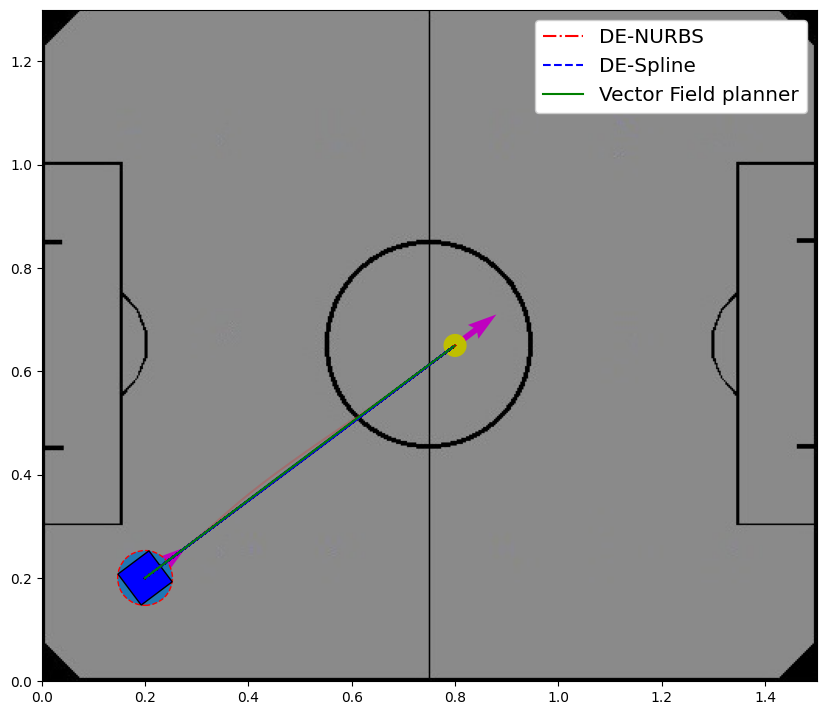

./results/images/result_case2


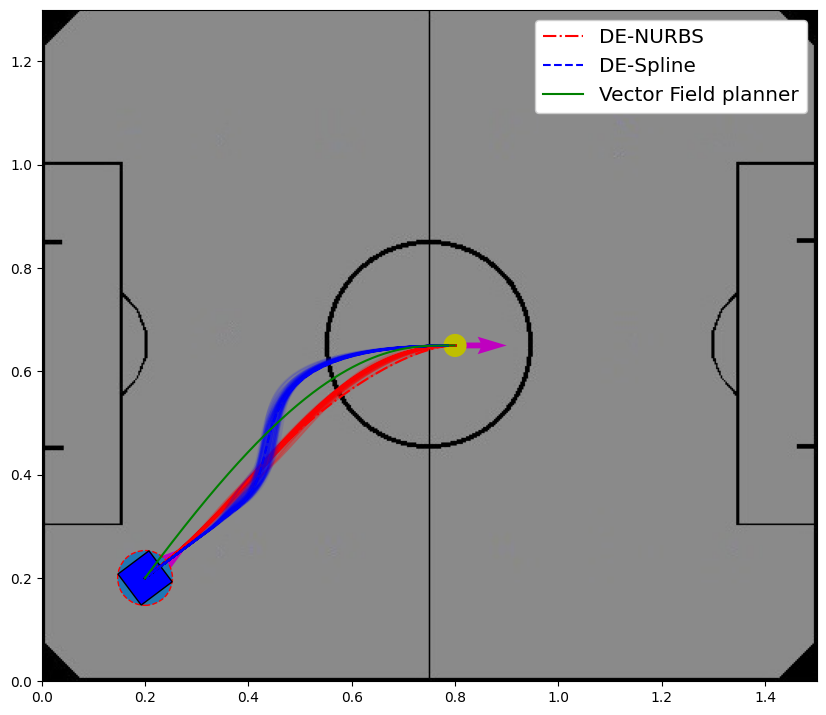

./results/images/result_case3


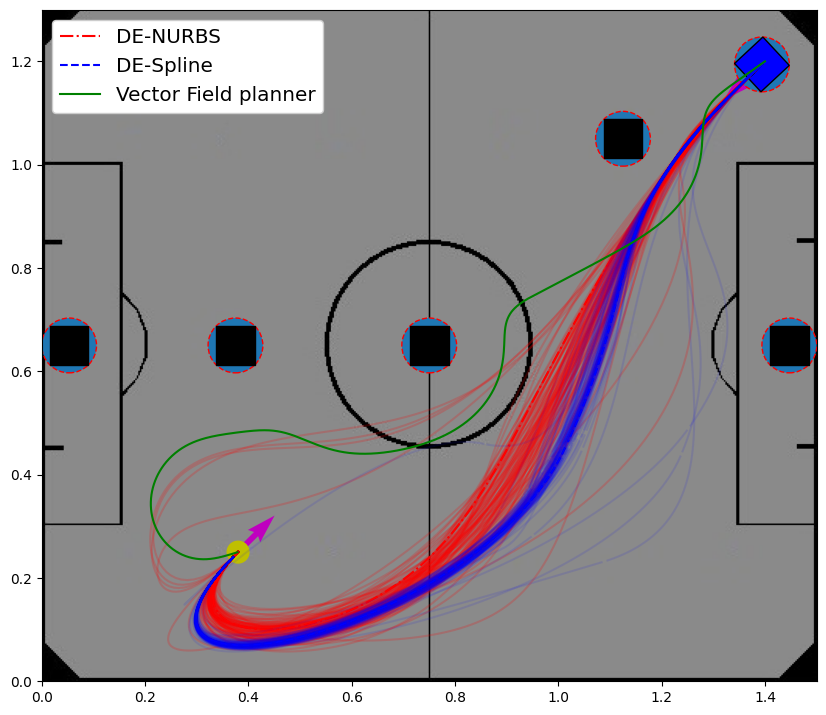

./results/images/result_case4


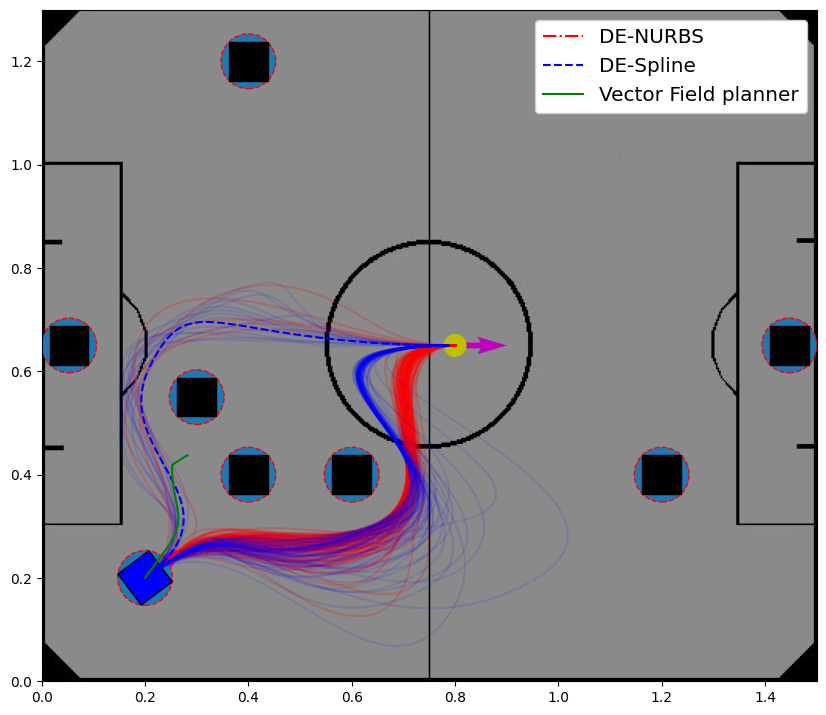

./results/images/result_case5


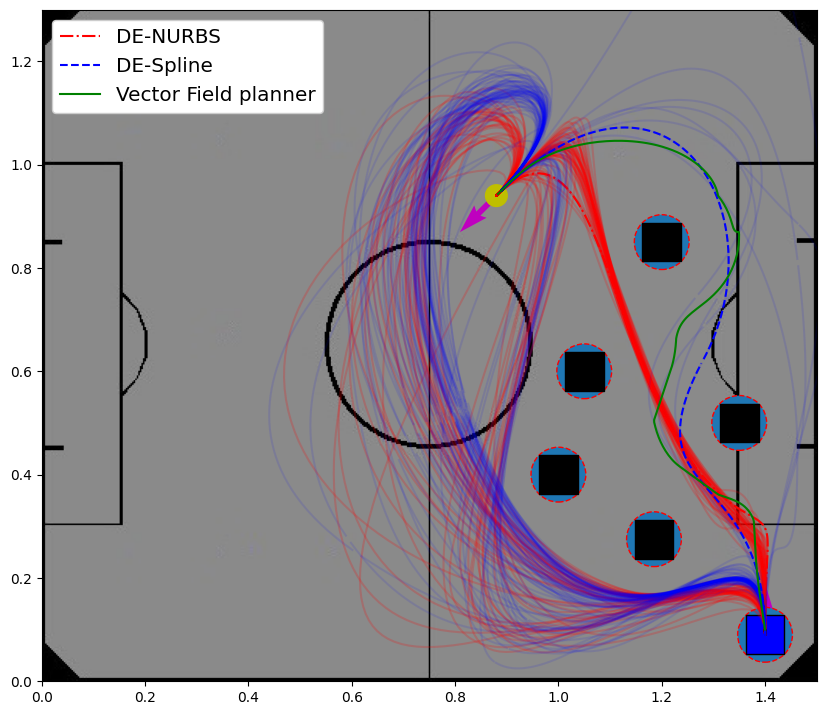

In [10]:
# show all paths
for i, problem_params_i in enumerate(problem_params):
    de2Dplanners.drawVSSSoccerAll(problem_params=problem_params_i, fitall_nurbs=[all_log_fit_nurbs[i]], path_all_nurbs=[all_log_path_nurbs[i]], fitall_spline=[all_log_fit_spline[i]], path_all_spline=[all_log_path_spline[i]], path_all_vectorfield_x=[FxAll[i]], path_all_vectorfield_y=[FyAll[i]], save=1, save_extension=".pdf", path_name = "./results/images/result_case",  img_path ="./campo.jpg")

./results/images/detail_result_case_5


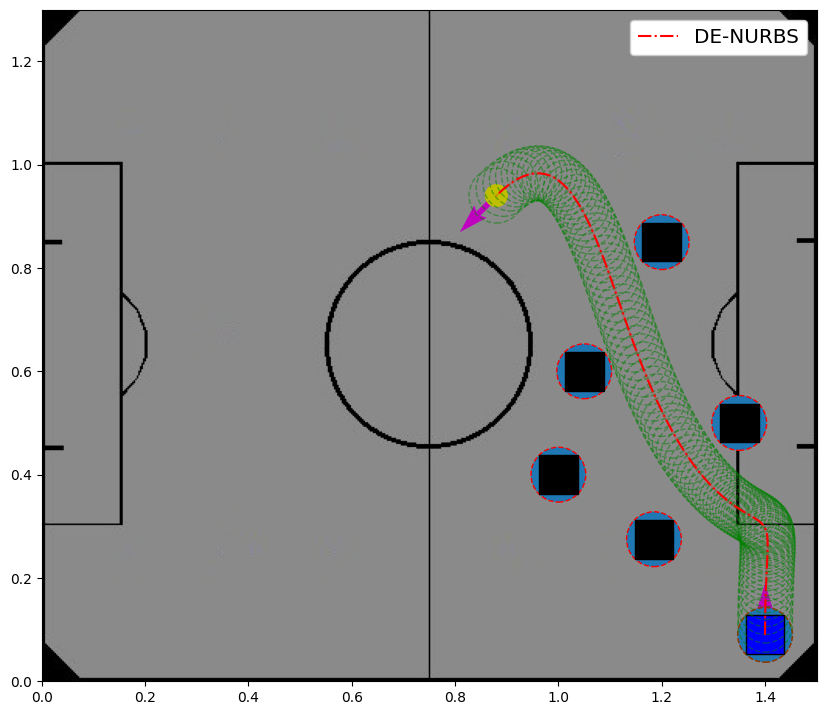

In [11]:
# The best result (case study 5)
idbest = np.argmin(all_log_fit_nurbs[4])
de2Dplanners.drawVSSSoccerAll(problem_params=problem_params_i, fitall_nurbs=[[all_log_fit_nurbs[4][idbest]]], path_all_nurbs=[[all_log_path_nurbs[4][idbest]]], robot_in_path=1, save=1, save_extension=".pdf", path_name = "./results/images/detail_result_case_",  img_path ="./campo.jpg")

In [8]:
# print result
for id in range(0,5):
    print(np.mean(np.array(all_log_fit_spline[id])[np.array(all_log_fit_spline[id])<10e6]), "+-", np.std(np.array(all_log_fit_spline[id])[np.array(all_log_fit_spline[id])<10e6]))
    print(np.mean(np.array(all_log_fit_nurbs[id])[np.array(all_log_fit_nurbs[id])<10e6]), "+-", np.std(np.array(all_log_fit_nurbs[id])[np.array(all_log_fit_nurbs[id])<10e6]))
print(all_log_fit_vf)

0.7500018297839713 +- 4.369317854937972e-06
0.7500111922609914 +- 0.00010851221940489124
0.880192152483073 +- 0.005821193176167819
0.7805460757854563 +- 0.001768717370716264
2.0825123922536233 +- 0.03311998488571276
1.9787263153055386 +- 0.05559278353758491
1.375822179939732 +- 0.09874445860523137
1.1354404694660878 +- 0.05997935926948375
2.2793446027729085 +- 0.2131317778692164
1.91343032895047 +- 0.47107575560126874
[0.7490036713442678, 0.803960119227651, 2.7052629788516946, 125000.2740153115, 10.374505580229163]


### Saving

In [18]:
# Save data in separated .csv file
path = "./results/"
for i in range(0,len(problem_params)):
    data = pd.DataFrame([], index=range(0,Nrepeat), columns= ["DE-Spline","DE-NURBS","Vector Field"])
    planner.set_problem(problem_params[i])
    data["DE-Spline"] =[ planner.costfunction_spline(path_param) for path_param in all_log_path_spline[i]]

    planner2.set_problem(problem_params[i])
    data["DE-NURBS"] =[ planner.costfunction_nurbs(path_param) for path_param in all_log_path_nurbs[i]]
    
    data["Vector Field"] = planners.costfunction(FxAll[i],FyAll[i], problem_params[i])
    file_name = path + 'result_costfunction_case_' +str(problem_params[i]["cases"][0])+".csv" 
    data.to_csv(file_name, index=False)

In [22]:
# save all data in one .csv file
path = "./results/"
N = len(all_log_fit_spline[0]) # repetitions
n = 3 # 3 planners
ncases = 4 # 4 study case

data = pd.DataFrame(columns= ["Replicate", "Planner", "Case", "Result" ])

for case in [0,1,2,4]:
    for instance in range(0,N):
        if all_log_fit_spline[case][instance] < 10e6:
            data = data.append({'Replicate' : instance, "Planner": 1, "Case": case+1, 'Result' : all_log_fit_spline[case][instance]}, ignore_index=True)
for case in [0,1,2,4]:
    for instance in range(0,N):
        data = data.append({'Replicate' : instance, "Planner": 2, "Case": case+1, 'Result' : all_log_fit_nurbs[case][instance]}, ignore_index=True)
for case in [0,1,2,4]:
    for instance in range(0,N):        
        data = data.append({'Replicate' : instance, "Planner": 3, "Case": case+1, 'Result' : all_log_fit_vf[case]}, ignore_index=True)

file_name = path + 'vector_result_costfunction.csv'
data.to_csv(file_name, index=False)